In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


In [ ]:
df= pd.read_csv("/content/cleaned_v3.csv")

In [ ]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Time_Converted
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,...,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,21:55
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,...,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,14:55
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,...,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,17:30
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,...,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,09:20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,...,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19:50


In [ ]:
df.drop(columns="Unnamed: 0",inplace=True)

In [ ]:
#shape of data

rows, columns= df.shape
print("This dataset has {} rows and {} columns".format(rows,columns))

This dataset has 45584 rows and 21 columns


In [ ]:
#Datatypes
df.dtypes.rename("Datatypes")

,Datatypes
ID,object
Delivery_person_ID,object
Delivery_person_Age,float64
Delivery_person_Ratings,float64
Restaurant_latitude,float64
Restaurant_longitude,float64
Delivery_location_latitude,float64
Delivery_location_longitude,float64
Order_Date,object
Time_Orderd,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [ ]:
df.isna().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,1854
Delivery_person_Ratings,1908
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,1731


1. Separate City name from Delivery_person_ID
2. Order_Date, time_ordered, time_ordered_picked convert this into datetime format
3. missing values in data in columns (Delivery_person_Age,Delivery_person_Ratings, Time_Orderd,Weather_conditions,Road_traffic_density,multiple_deliveries,Festival, City


In [ ]:
df.sample(50)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Time_Converted
44635,0x6911,HYDRES11DEL03,36.0,4.6,17.430448,78.418213,17.490448,78.478213,05-04-2022,21:40,...,Sunny,Jam,1,Snack,motorcycle,1.0,No,Metropolitian,23,21:40
43465,0x846c,PUNERES15DEL01,27.0,4.7,18.636215,73.751081,18.706215,73.821081,18-03-2022,18:45,...,Windy,Medium,2,Meal,motorcycle,1.0,No,Metropolitian,16,18:45
11622,0x6038,JAPRES13DEL03,20.0,5.0,26.846156,75.802300,26.936156,75.892300,04-03-2022,18:50,...,Sunny,Medium,2,Snack,electric_scooter,1.0,No,Metropolitian,15,18:50
30463,0x2c5e,BANGRES20DEL02,25.0,4.5,12.972161,77.596014,13.052161,77.676014,14-03-2022,21:20,...,Stormy,Jam,2,Buffet,scooter,1.0,No,Urban,21,21:20
19898,0x84b9,VADRES05DEL03,23.0,4.7,22.310526,73.170937,22.340526,73.200937,05-04-2022,22:00,...,Windy,Jam,1,Meal,scooter,1.0,No,Metropolitian,27,22:00
9834,0x91fe,BANGRES04DEL02,21.0,4.8,12.980410,77.640489,13.030410,77.690489,09-03-2022,17:45,...,Sandstorms,Medium,1,Snack,motorcycle,1.0,No,Metropolitian,27,17:45
13725,0x39bd,VADRES14DEL01,37.0,4.2,22.311603,73.165012,22.381603,73.235012,02-04-2022,22:20,...,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,39,22:20
29336,0xcc31,ALHRES12DEL02,39.0,4.6,25.443994,81.860187,25.523994,81.940187,12-02-2022,22:59,...,Stormy,Low,2,Snack,electric_scooter,1.0,No,NaN,19,22:59
20941,0x1cd9,PUNERES010DEL03,20.0,4.6,18.539299,73.897902,18.569299,73.927902,05-03-2022,19:55,...,Sandstorms,Jam,2,Drinks,scooter,0.0,No,Metropolitian,16,19:55
14871,0x61bf,INDORES18DEL02,25.0,4.6,22.753839,75.897429,22.773839,75.917429,21-03-2022,11:15,...,Windy,High,2,Meal,scooter,1.0,No,Metropolitian,21,11:15


In [ ]:
df.isna().sum().sum()

np.int64(10862)

### Missing Value Analysis

<Axes: >

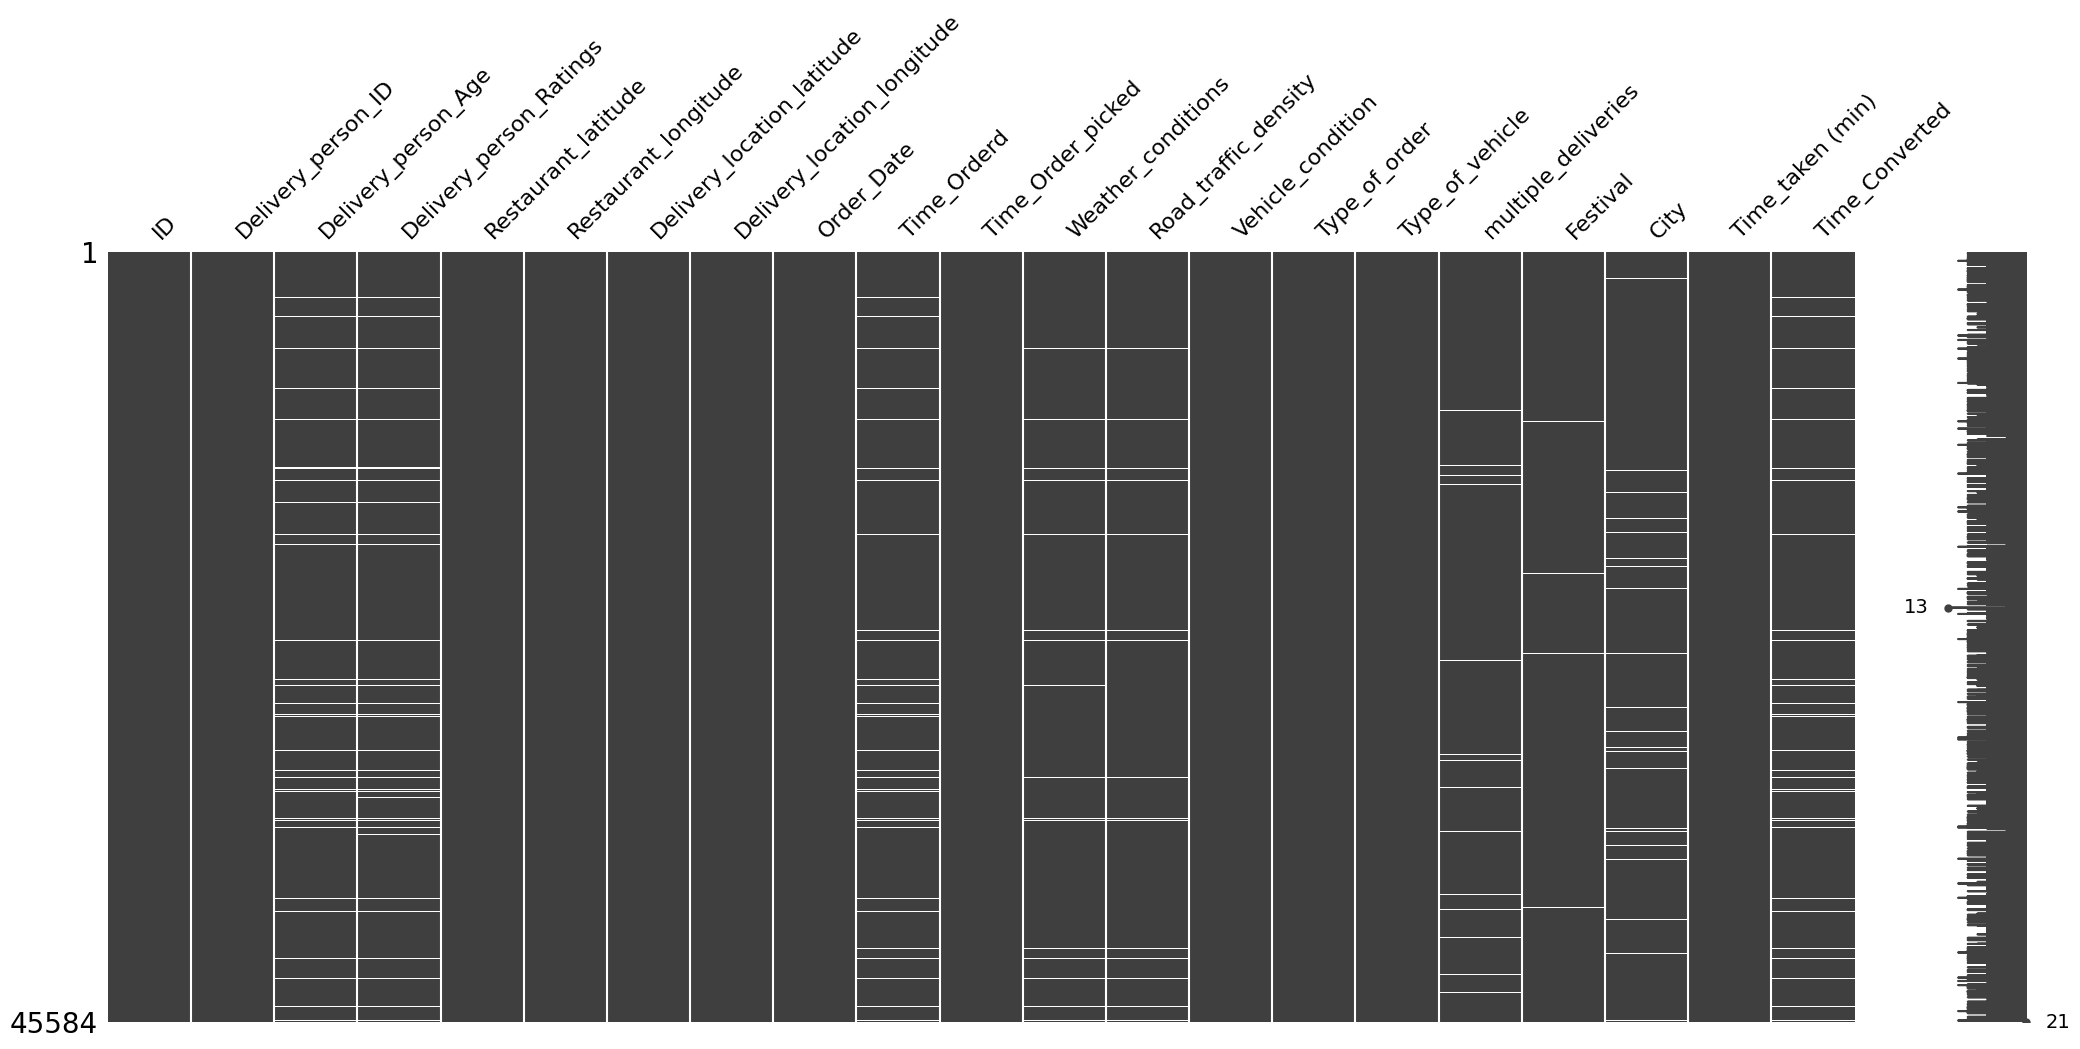

In [ ]:
msno.matrix(df)

<Axes: >

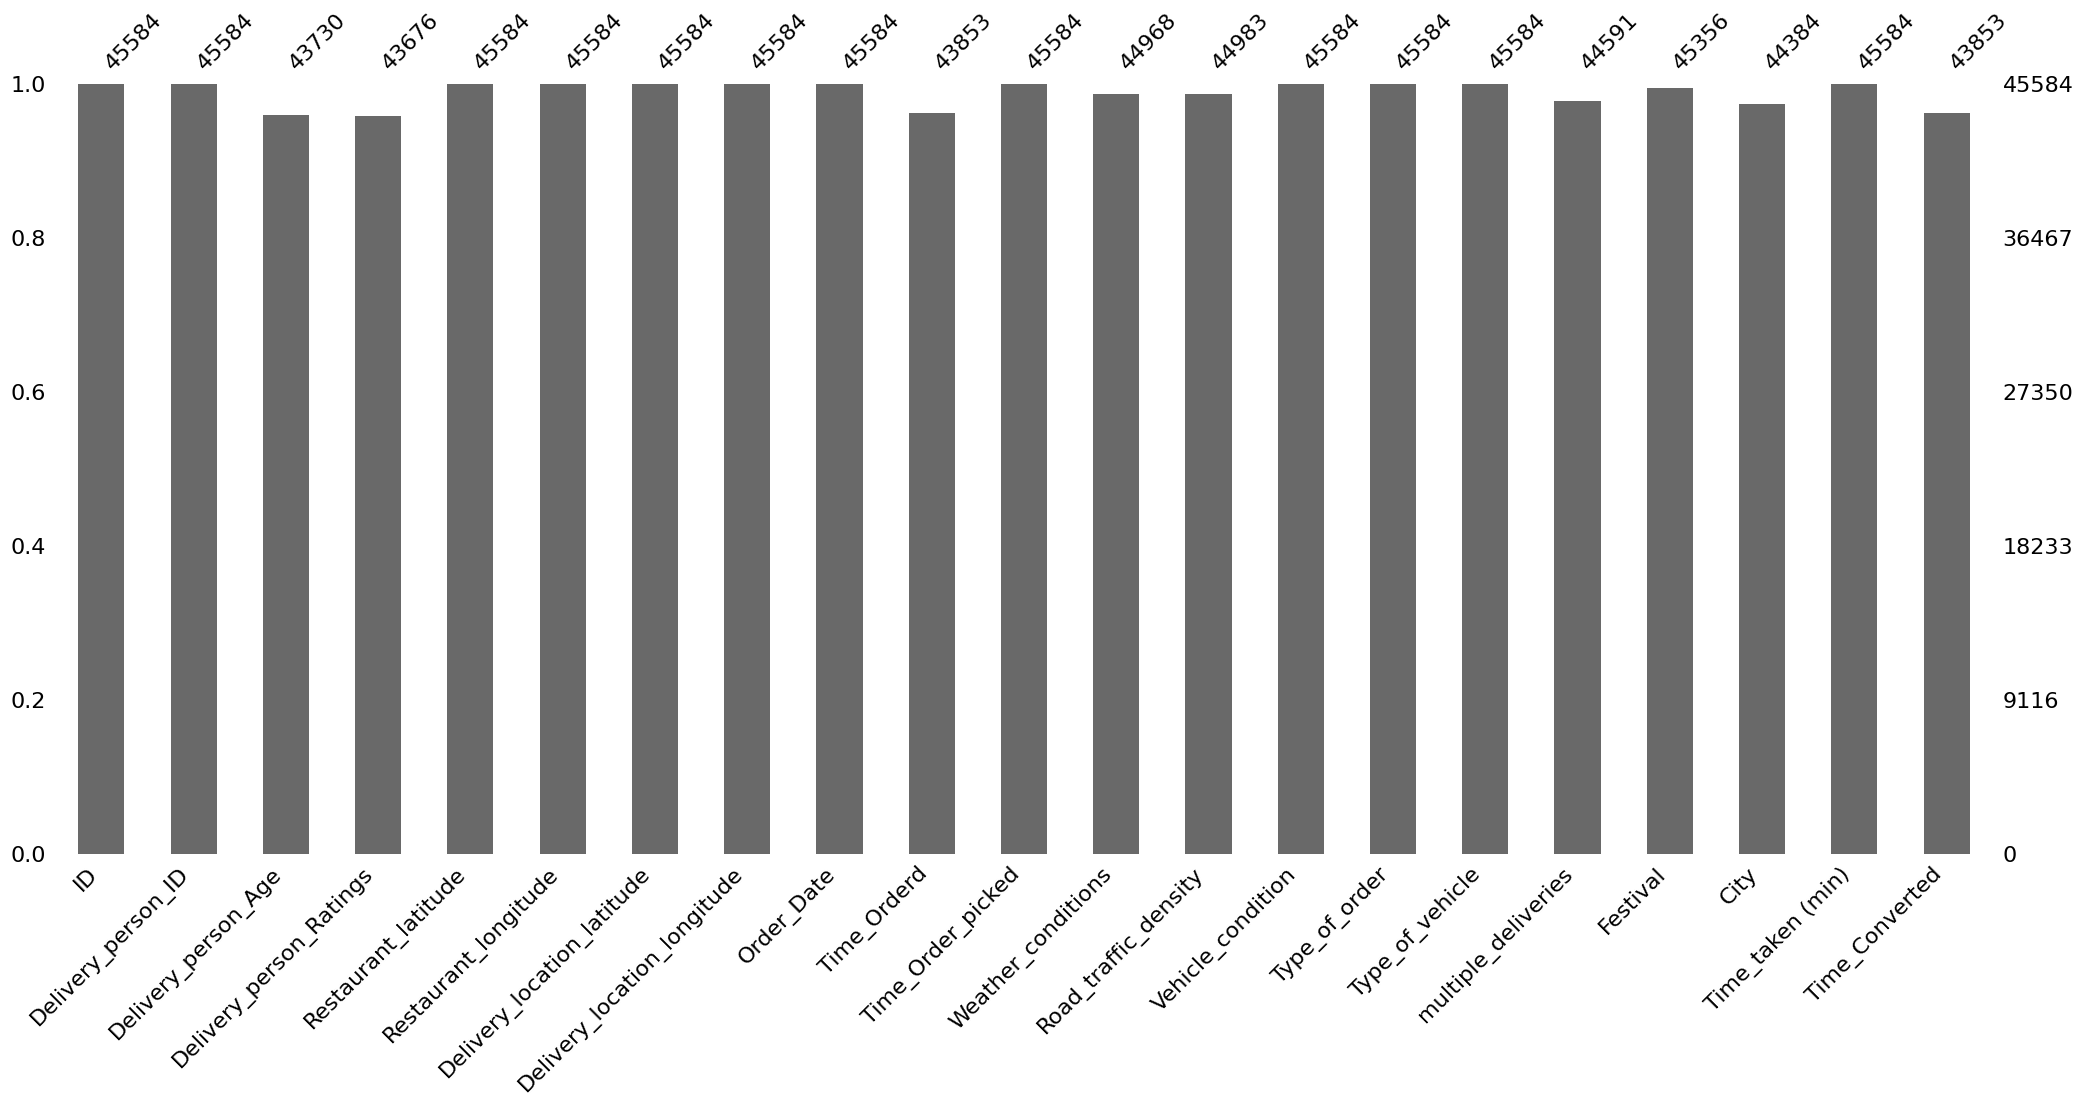

In [ ]:
msno.bar(df)

<Axes: >

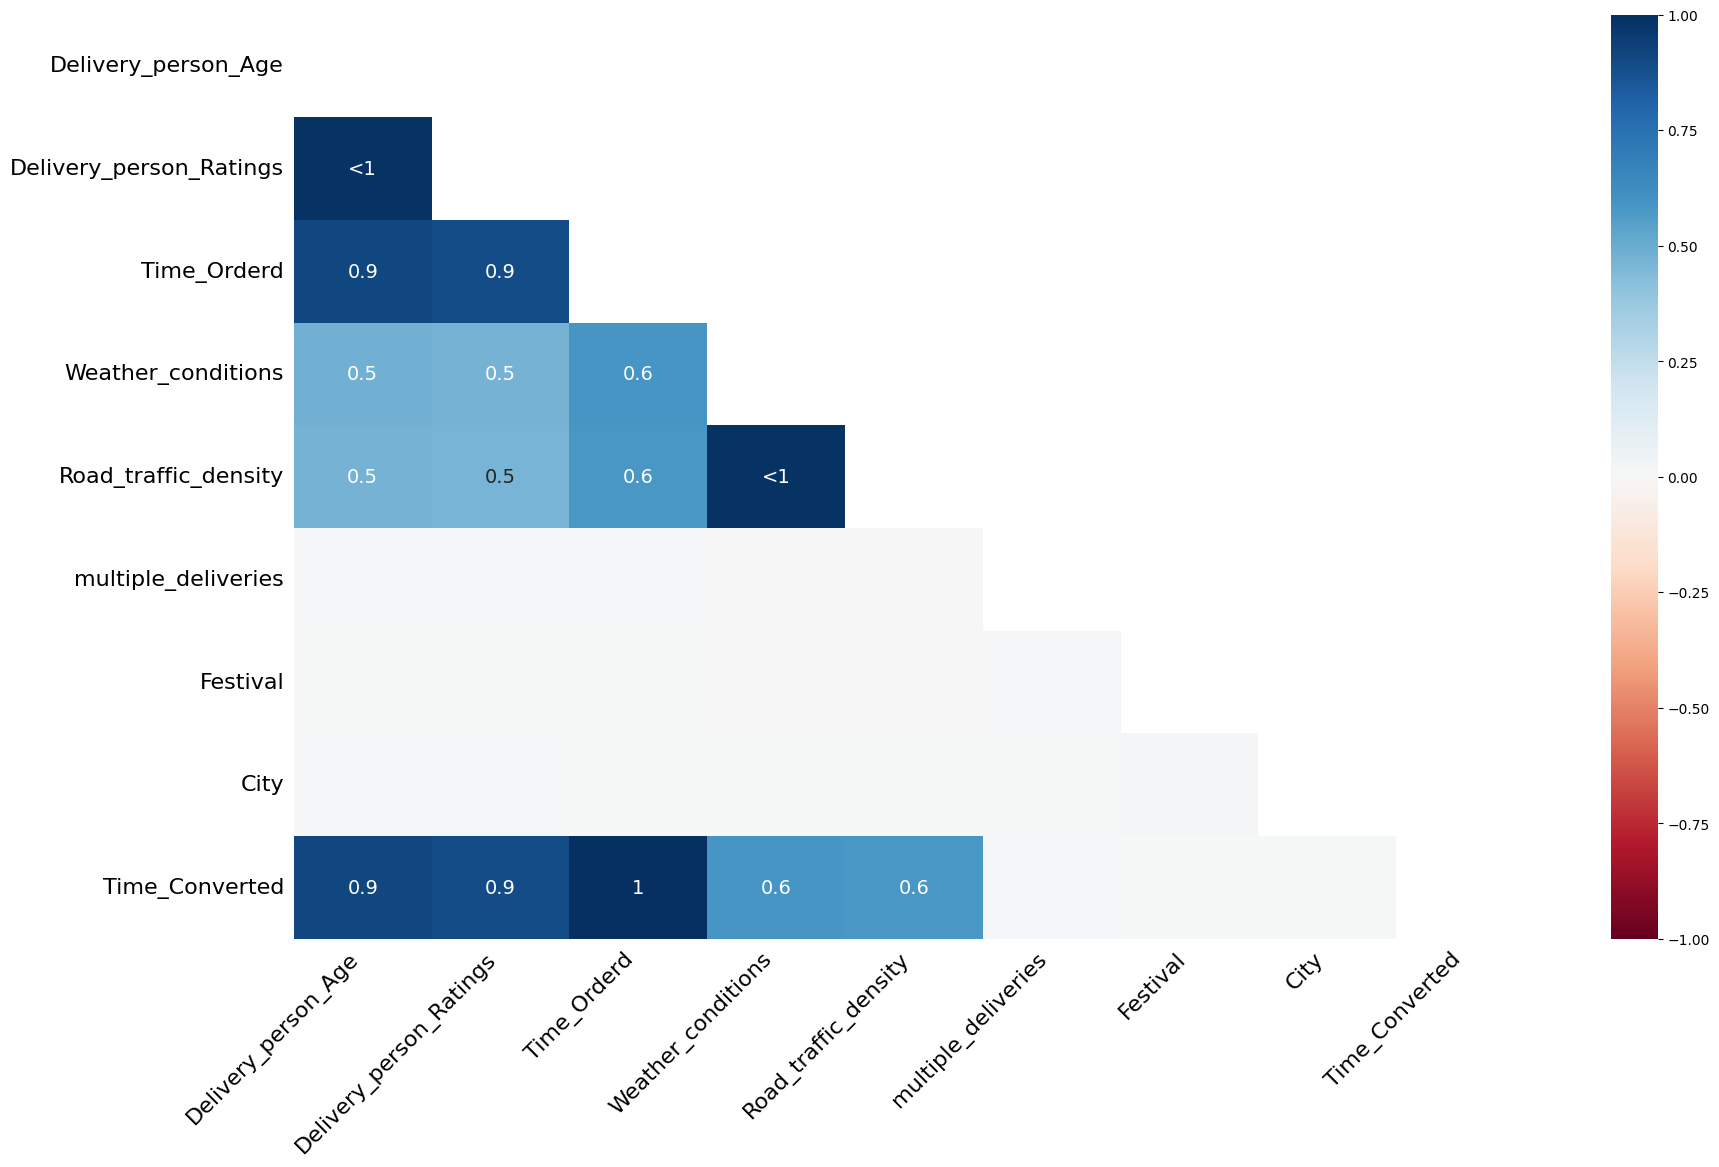

In [ ]:
msno.heatmap(df)

# 📊 Interpreting Missing Data Heatmap (Missingno)

This heatmap shows **correlations in missingness** between dataset columns.  
It helps us understand whether missing values in one column are related to missing values in another.

---

## 🔹 How to Read the Heatmap
- **Scale**:
  - **1.0 (dark blue)** → Perfect correlation in missingness (always missing together).
  - **0.0 (white)** → Missingness is independent.
  - **Negative values (red)** → One column is missing when the other is present.

---

## Observations

1. **Strong correlations (~0.9)**  
   - `Delivery_person_Age` ↔ `Delivery_person_Ratings`  
   - `Delivery_person_Age` ↔ `Time_Ordered`  
   - When **Age** is missing, often **Ratings** and **Time_Ordered** are also missing.  
   ➝ Indicates possible **data entry issue** or **system-level logging problem**.

2. **Moderate correlations (~0.5–0.6)**  
   - `Weather_conditions` ↔ `Road_traffic_density`  
   - If one is missing, the other tends to be missing too.  
   ➝ Could be due to **external data source failure** (e.g., missing API values).

3. **Columns with little/no correlation**  
   - `multiple_deliveries`, `Festival`, `City` → mostly white (very low correlation).  
   - These columns likely have fewer missing values or are mostly complete.

---

## Possible Issues
- **Systematic Missingness**: Some features (`Age`, `Ratings`, `Time_Ordered`) are missing together → not random.  
- **External Data Dependency**: Weather & Traffic missingness aligns, suggesting external API/data collection gaps.  
- **Low-Risk Columns**: Festival and City are largely complete, so less concern.





In [ ]:
df[['Weather_conditions','Road_traffic_density']].isna().sum()

,0
Weather_conditions,616
Road_traffic_density,601


In [ ]:
(df[['Weather_conditions','Road_traffic_density']].isna().all(axis=1).sum())/df[['Weather_conditions','Road_traffic_density']].isna().sum()

,0
Weather_conditions,0.975649
Road_traffic_density,1.000000


<Axes: >

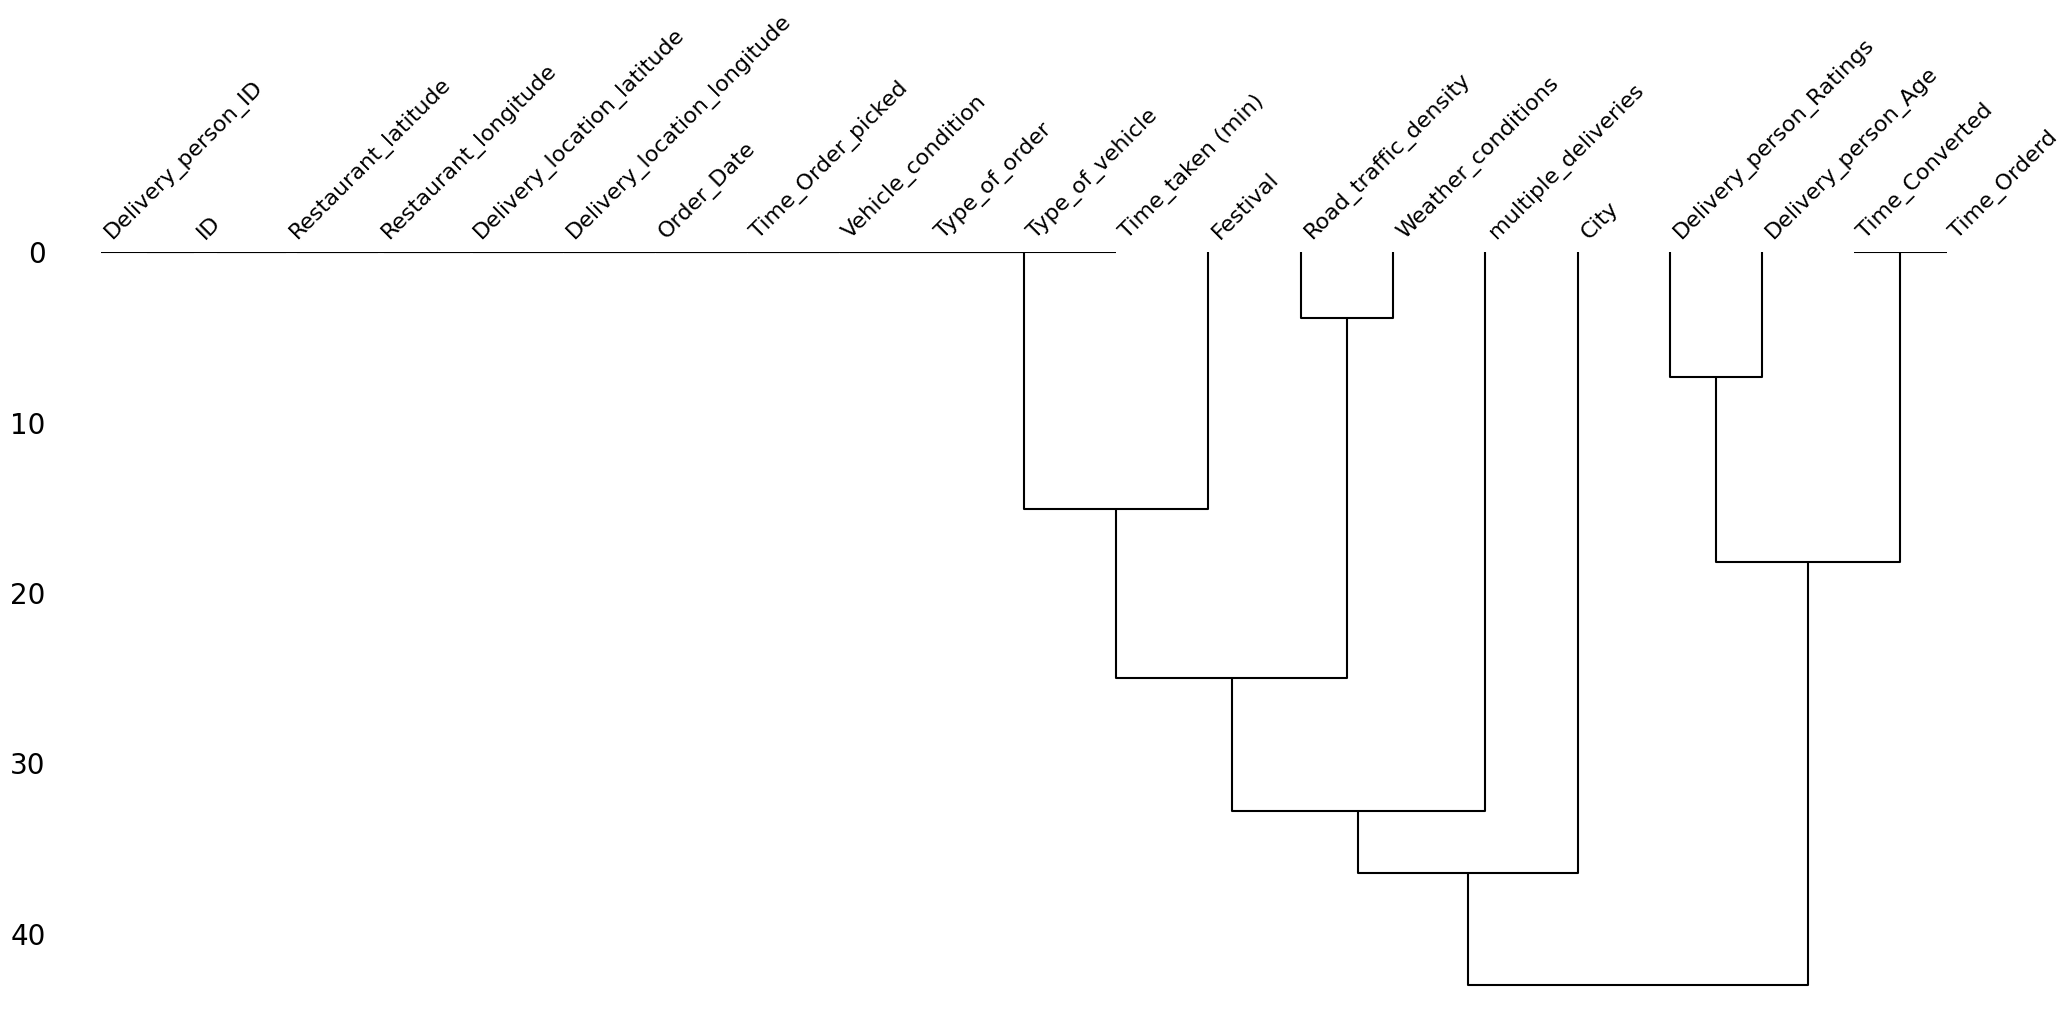

In [ ]:
msno.dendrogram(df)

In [ ]:

# percentage of rows missing data

(df.isna().any(axis=1).sum() /df.shape[0]) * 10

np.float64(0.9268603018603018)

## Data Cleaning

In [ ]:
#renaming columns
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)',
       'Time_Converted'],
      dtype='object')

In [ ]:
def change_names(data: pd.DataFrame):
  return (
        data.rename(str.lower,axis=1)
        .rename({
            "delivery_person_id" : "rider_id",
            "delivery_person_age": "age",
            "delivery_person_ratings": "ratings",
            "delivery_location_latitude": "delivery_latitude",
            "delivery_location_longitude": "delivery_longitude",
            "time_orderd": "order_time",
            "time_order_picked": "order_time_picked",
            "weather_conditions": "weather",
            "road_traffic_density": "traffic",
            "city": "city_type",
            "time_taken (min)": "time_taken"},axis=1)
    )

In [ ]:
df=change_names(df)

In [ ]:
df.head()

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,...,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,time_converted
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,...,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,21:55
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,...,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,14:55
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,...,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,17:30
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,...,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,09:20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,...,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19:50


In [ ]:

# check for duplicate rows

df.drop(columns=["id","rider_id"]).duplicated().sum()

np.int64(0)

### Column Wise

### ID

In [ ]:
df['id'].nunique()

45584

### Rider_id

In [ ]:
df['rider_id'].nunique()

1320

In [ ]:
df['rider_id'].value_counts()

,count
rider_id,
PUNERES01DEL01,67
JAPRES11DEL02,67
HYDRES04DEL02,66
JAPRES03DEL01,66
VADRES08DEL02,66
...,...
BHPRES15DEL03,7
DEHRES18DEL03,7
KOCRES16DEL03,6


In [ ]:
df['rider_id'].str.split('RES').str.get(0).rename("city_name")

,city_name
0,DEH
1,KOC
2,PUNE
3,LUDH
4,KNP
...,...
45579,JAP
45580,AGR
45581,CHEN
45582,COIMB


### Age

In [ ]:
df['age'].describe()

,age
count,43730.000000
mean,29.566911
std,5.815064
min,15.000000
25%,25.000000
50%,30.000000
75%,35.000000
max,50.000000


Minimum Age 15?

<Axes: ylabel='age'>

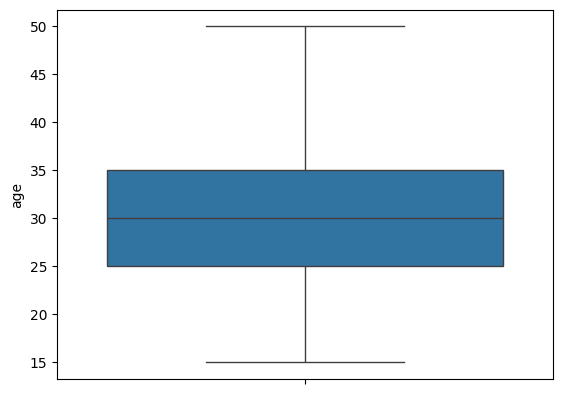

In [ ]:
#boxplot
sns.boxplot(df['age'])

In [ ]:
#check if age is less than 18
minor=df[df['age']<18]

In [ ]:
minor

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_time_picked,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
2378,0x564,JAPRES15DEL03,15.0,1.0,-26.891191,75.802083,26.981191,75.892083,12-03-2022,NaN,17:20,NaN,NaN,3,Meal,motorcycle,0.0,No,Urban,15
2896,0xcd0,INDORES010DEL03,15.0,1.0,22.750040,75.902847,22.810040,75.962847,03-04-2022,NaN,20:30,NaN,NaN,3,Snack,scooter,1.0,No,Metropolitian,29
2942,0x91a,SURRES17DEL03,15.0,1.0,21.149569,72.772697,21.209569,72.832697,21-03-2022,NaN,22:10,NaN,NaN,3,Buffet,bicycle,1.0,No,Metropolitian,20
5893,0x474,CHENRES15DEL03,15.0,1.0,13.026286,80.275235,13.056286,80.305235,11-03-2022,NaN,20:50,NaN,NaN,3,Drinks,bicycle,1.0,No,Metropolitian,25
9147,0x73f,BANGRES05DEL01,15.0,1.0,12.970324,77.645748,13.080324,77.755748,25-03-2022,NaN,23:25,NaN,NaN,3,Buffet,motorcycle,2.0,No,Metropolitian,34
10891,0x1b49,MUMRES14DEL02,15.0,1.0,19.181300,72.836191,19.231300,72.886191,30-03-2022,NaN,20:55,NaN,NaN,3,Buffet,motorcycle,1.0,No,Metropolitian,39
11116,0x40b,SURRES12DEL01,15.0,1.0,-21.183434,-72.814492,21.193434,72.824492,05-03-2022,NaN,11:30,NaN,NaN,3,Meal,scooter,1.0,No,Urban,27
12084,0x523,INDORES03DEL02,15.0,1.0,22.751857,75.866699,22.801857,75.916699,24-03-2022,NaN,21:15,NaN,NaN,3,Buffet,bicycle,0.0,No,Metropolitian,28
15115,0x18b0,RANCHIRES02DEL01,15.0,1.0,0.000000,0.000000,0.070000,0.070000,16-03-2022,NaN,23:55,NaN,NaN,3,Meal,bicycle,1.0,No,Metropolitian,21
15918,0x550,CHENRES08DEL02,15.0,1.0,13.022394,80.242439,13.072394,80.292439,11-03-2022,NaN,18:10,NaN,NaN,3,Snack,bicycle,0.0,No,Metropolitian,17


1. All the minor data has age of 15
2. Some of the restaurant longitude and latitude are in negative as in india does not have this kind of latitude and longitude
3. No data about order_time, weather and traffic conditions.
4. It is illegal to drive at age 15.

**We need to remove this data as lot of data is missing here**

In [ ]:
#Length of minor data
minor_index= minor.index.tolist()
len(minor)

38

### ratings

In [ ]:
df['ratings'].describe()

,ratings
count,43676.000000
mean,4.633774
std,0.334744
min,1.000000
25%,4.500000
50%,4.700000
75%,4.900000
max,6.000000


**Rating 6 is not possible**

<Axes: ylabel='ratings'>

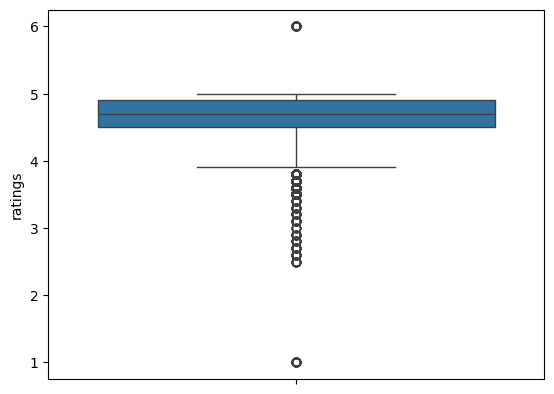

In [ ]:
sns.boxplot(df['ratings'])

In [ ]:
len(df[df['ratings']==1])

38

1. All the minor data and ratings with 1 are same so it is anomaly in the data
2. Rating 6 is also anomaly as ratings are upto 5 only


In [ ]:
six_star=df[df['ratings']==6]
six_star

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,...,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,time_converted
3577,0x46d,BANGRES05DEL01,50.0,6.0,-12.970324,-77.645748,13.010324,77.685748,13-03-2022,NaN,...,NaN,NaN,3,Meal,electric_scooter,0.0,No,Urban,25,NaN
4705,0x493,HYDRES17DEL01,50.0,6.0,-17.451976,-78.385883,17.561976,78.495883,04-04-2022,NaN,...,NaN,NaN,3,Snack,bicycle,0.0,No,Metropolitian,27,NaN
5160,0x4f2,JAPRES08DEL01,50.0,6.0,-26.910262,-75.783013,27.020262,75.893013,18-03-2022,NaN,...,NaN,NaN,3,Drinks,scooter,1.0,No,Metropolitian,20,NaN
5353,0x430,BANGRES19DEL01,50.0,6.0,12.914264,77.678400,13.024264,77.788400,06-04-2022,NaN,...,NaN,NaN,3,Meal,electric_scooter,1.0,No,Metropolitian,18,NaN
5642,0xbef1,AGRRES13DEL02,50.0,6.0,-27.159795,-78.042990,27.209795,78.092990,13-02-2022,NaN,...,NaN,NaN,3,Drinks,scooter,1.0,No,Metropolitian,20,NaN
6385,0x427,JAPRES06DEL02,50.0,6.0,26.911927,75.797282,27.041927,75.927282,02-04-2022,NaN,...,NaN,NaN,3,Meal,electric_scooter,0.0,No,Urban,20,NaN
7022,0x3eb,MYSRES15DEL02,50.0,6.0,-12.352058,-76.606650,12.372058,76.626650,15-03-2022,NaN,...,NaN,NaN,3,Buffet,scooter,1.0,No,Metropolitian,14,NaN
7672,0xd42,VADRES09DEL01,50.0,6.0,0.000000,0.000000,0.010000,0.010000,21-03-2022,NaN,...,NaN,NaN,3,Meal,bicycle,1.0,No,Metropolitian,22,NaN
9490,0x3f0,BANGRES010DEL01,50.0,6.0,12.933298,77.614293,13.003298,77.684293,12-03-2022,NaN,...,NaN,NaN,3,Drinks,scooter,1.0,No,Urban,17,NaN
9526,0x3ef,RANCHIRES13DEL01,50.0,6.0,-23.374989,-85.335486,23.444989,85.405486,20-03-2022,NaN,...,NaN,NaN,3,Snack,bicycle,1.0,No,Metropolitian,32,NaN


All the conditions are same as minor data, data removal needs to done

In [ ]:
six_star_index=six_star.index.tolist()

In [ ]:
location_col= df.columns[4:8].tolist()
location_col

['restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude']

### Location

In [ ]:
location= df[location_col]
location

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
0,30.327968,78.046106,30.397968,78.116106
1,10.003064,76.307589,10.043064,76.347589
2,18.562450,73.916619,18.652450,74.006619
3,30.899584,75.809346,30.919584,75.829346
4,26.463504,80.372929,26.593504,80.502929
...,...,...,...,...
45579,26.902328,75.794257,26.912328,75.804257
45580,0.000000,0.000000,0.070000,0.070000
45581,13.022394,80.242439,13.052394,80.272439
45582,11.001753,76.986241,11.041753,77.026241


In [ ]:
location.describe()

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,45584.000000,45584.000000,45584.000000,45584.000000
mean,17.017948,70.229684,17.465480,70.844161
std,8.185674,22.885575,7.335562,21.120578
min,-30.905562,-88.366217,0.010000,0.010000
25%,12.933284,73.170000,12.988453,73.280000
50%,18.551440,75.897963,18.633934,76.002574
75%,22.728163,78.044095,22.785049,78.107044
max,30.914057,88.433452,31.054057,88.563452


In [ ]:
#check of data where it is invalid for india

lower_range_lat= 6.44
lower_range_long= 68.70
location.loc[
    (df['restaurant_latitude'] < lower_range_lat) |
    (df['restaurant_longitude'] < lower_range_long) |
    (df['delivery_latitude'] < lower_range_lat) |
    (df['delivery_longitude'] < lower_range_long)
].sample(50)

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
21778,0.000000,0.000000,0.010000,0.010000
525,-12.325461,-76.632278,12.385461,76.692278
5965,0.000000,0.000000,0.090000,0.090000
5221,0.000000,0.000000,0.090000,0.090000
31229,-19.176269,-72.836721,19.226269,72.886721
15236,0.000000,0.000000,0.080000,0.080000
42011,0.000000,0.000000,0.110000,0.110000
21735,0.000000,0.000000,0.050000,0.050000
16803,0.000000,0.000000,0.070000,0.070000
15477,0.000000,0.000000,0.020000,0.020000


In [ ]:
#total numbers of incorrect_data

location.loc[
    (df['restaurant_latitude'] < lower_range_lat) |
    (df['restaurant_longitude'] < lower_range_long) |
    (df['delivery_latitude'] < lower_range_lat) |
    (df['delivery_longitude'] < lower_range_long)
].shape[0]

4071

**Total 4071 rows have incorrect data for location**

In [ ]:
location.loc[
    (df['restaurant_latitude'] < lower_range_lat) |
    (df['restaurant_longitude'] < lower_range_long) |
    (df['delivery_latitude'] < lower_range_lat) |
    (df['delivery_longitude'] < lower_range_long)
].describe()

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,4071.000000,4071.000000,4071.000000,4071.000000
mean,-2.149416,2.068601,2.212538,8.299885
std,6.537913,25.270676,6.538283,23.980011
min,-30.905562,-88.366217,0.010000,0.010000
25%,0.000000,0.000000,0.040000,0.040000
50%,0.000000,0.000000,0.070000,0.070000
75%,0.000000,0.000000,0.110000,0.110000
max,0.000000,88.433452,31.045562,88.523452


(array([1, 2, 3, 4]),
 [Text(1, 0, 'restaurant_latitude'),
  Text(2, 0, 'restaurant_longitude'),
  Text(3, 0, 'delivery_latitude'),
  Text(4, 0, 'delivery_longitude')])

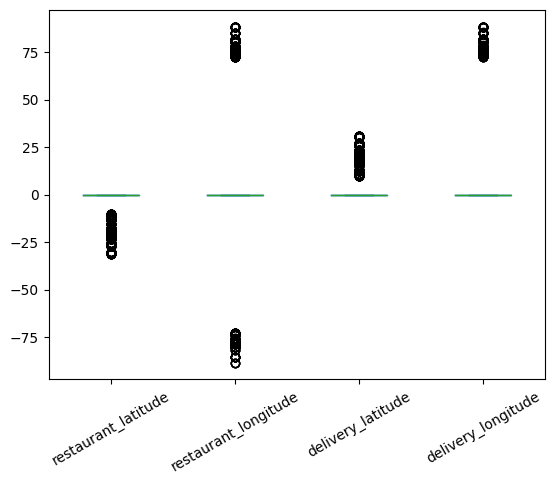

In [ ]:
location.loc[
    (df['restaurant_latitude'] < lower_range_lat) |
    (df['restaurant_longitude'] < lower_range_long) |
    (df['delivery_latitude'] < lower_range_lat) |
    (df['delivery_longitude'] < lower_range_long)
].plot(kind="box")
plt.xticks(rotation=30)

1. Negative Values are correct, we need to inverse that and it will be correct by using absoulte here.
2. 0 values need to fill with advanced imputation techniques.

[Text(1, 0, 'restaurant_latitude'),
 Text(2, 0, 'restaurant_longitude'),
 Text(3, 0, 'delivery_latitude'),
 Text(4, 0, 'delivery_longitude')]

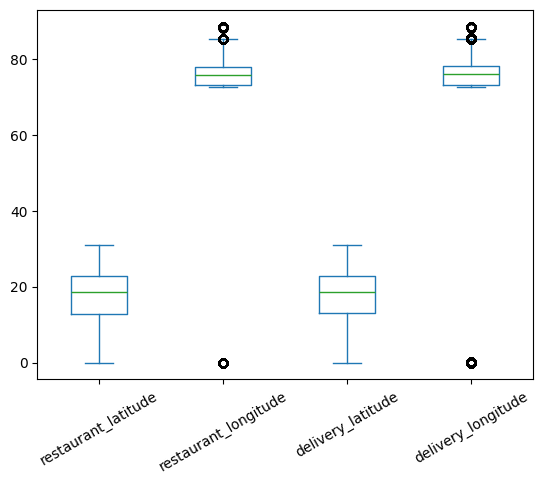

In [ ]:
location.abs().plot(kind="box")
ax=plt.gca()
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [ ]:
(
    location.abs()
    .loc[lambda df_:
        (df_['restaurant_latitude'] < lower_range_lat) |
        (df_['restaurant_longitude'] < lower_range_long) |
        (df_['delivery_latitude'] < lower_range_lat) |
        (df_['delivery_longitude'] < lower_range_long)]
    .shape[0]

)

3640

**3640 rows have messy data(0)**

In [ ]:
(
    location.abs()
    .loc[lambda df_:
        (df_['restaurant_latitude'] < 1) |
        (df_['restaurant_longitude'] < 1) |
        (df_['delivery_latitude'] < 1) |
        (df_['delivery_longitude'] < 1)]


)

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
24,0.0,0.0,0.11,0.11
43,0.0,0.0,0.03,0.03
48,0.0,0.0,0.08,0.08
50,0.0,0.0,0.06,0.06
58,0.0,0.0,0.02,0.02
...,...,...,...,...
45560,0.0,0.0,0.07,0.07
45567,0.0,0.0,0.13,0.13
45568,0.0,0.0,0.09,0.09
45570,0.0,0.0,0.05,0.05


In [ ]:

def clean_lat_long(data: pd.DataFrame, threshold=1):
    location_columns = location.columns.tolist()

    return (
        data
        .assign(**{
            col: (
                np.where(data[col] < threshold, np.nan, data[col].values)
            )
            for col in location_columns
        })
    )

In [ ]:
clean_lat_long(df).isna().sum()

,0
id,0
rider_id,0
age,1854
ratings,1908
restaurant_latitude,4071
restaurant_longitude,3802
delivery_latitude,3640
delivery_longitude,3640
order_date,0
order_time,1731


### Order Date

In [ ]:
df['order_date'].isna().sum()

np.int64(0)

In [ ]:
df['order_date'].unique()

array(['12-02-2022', '13-02-2022', '04-03-2022', '14-02-2022',
       '02-04-2022', '01-03-2022', '16-03-2022', '20-03-2022',
       '15-02-2022', '10-03-2022', '11-03-2022', '27-03-2022',
       '26-03-2022', '05-04-2022', '12-03-2022', '01-04-2022',
       '05-03-2022', '11-02-2022', '08-03-2022', '03-04-2022',
       '30-03-2022', '28-03-2022', '18-03-2022', '14-03-2022',
       '06-04-2022', '04-04-2022', '24-03-2022', '19-03-2022',
       '09-03-2022', '25-03-2022', '02-03-2022', '13-03-2022',
       '29-03-2022', '31-03-2022', '17-03-2022', '07-03-2022',
       '15-03-2022', '16-02-2022', '03-03-2022', '18-02-2022',
       '23-03-2022', '17-02-2022', '06-03-2022', '21-03-2022'],
      dtype=object)

In [ ]:
#range of dates
order_date= pd.to_datetime(df['order_date'],dayfirst=True)
order_date.max() - order_date.min()

Timedelta('54 days 00:00:00')

In [ ]:
#min and max dates
order_date.agg(["min","max"]).set_axis(["start","end"],axis=0)

,order_date
start,2022-02-11
end,2022-04-06


In [ ]:
#extract day, day name,month and year
def extract_datetime_features(ser):
    date_col = pd.to_datetime(ser,dayfirst=True)

    return (
        pd.DataFrame(
            {
                "day": date_col.dt.day,
                "month": date_col.dt.month,
                "year": date_col.dt.year,
                "day_of_week": date_col.dt.day_name(),
                "is_weekend": date_col.dt.day_name().isin(["Saturday","Sunday"]).astype(int)
            }
        ))

In [ ]:

extract_datetime_features(df['order_date'])

,day,month,year,day_of_week,is_weekend
0,12,2,2022,Saturday,1
1,13,2,2022,Sunday,1
2,4,3,2022,Friday,0
3,13,2,2022,Sunday,1
4,14,2,2022,Monday,0
...,...,...,...,...,...
45579,24,3,2022,Thursday,0
45580,16,2,2022,Wednesday,0
45581,11,3,2022,Friday,0
45582,7,3,2022,Monday,0


np.int64(0)

In [ ]:
def check_invalid_times(series: pd.Series):
    """
    Check a pandas Series for invalid times like '24:xx:xx'.
    Returns the rows containing such values.
    """
    # Ensure everything is string for pattern matching
    series_str = series.astype(str)

    # Boolean mask: values starting with '24:'
    mask = series_str.str.startswith("24:")

    return series[mask]


In [ ]:
check_invalid_times(df['order_time_picked'])

,order_time_picked


In [ ]:
def time_of_day(ser):
    time_col = pd.to_datetime(ser,format='mixed').dt.hour

    return(
        np.select(condlist=[(ser.between(6,12,inclusive='left')),
                            (ser.between(12,17,inclusive='left')),
                            (ser.between(17,20,inclusive='left')),
                            (ser.between(20,24,inclusive='left'))],
                  choicelist=["morning","afternoon","evening","night"],
                  default="after_midnight")
    )

In [ ]:
time_subset = df.loc[:,["order_time","order_time_picked"]]
time_subset

,order_time,order_time_picked
0,21:55,22:10
1,14:55,15:05
2,17:30,17:40
3,09:20,09:30
4,19:50,20:05
...,...,...
45579,11:35,11:45
45580,19:55,20:10
45581,23:50,00:05
45582,13:35,13:40


In [ ]:

time_subset.columns.tolist()

['order_time', 'order_time_picked']

In [ ]:
(
    time_subset
    .assign(**{
        col: pd.to_datetime(time_subset[col].replace("NaN ",np.nan).dropna(),format="mixed")
        for col in time_subset.columns.tolist()}
    )
    .assign(
        pickup_time = lambda x: (x['order_time_picked'] - x['order_time']).dt.seconds / 60,
        order_time_hour = lambda x: x['order_time'].dt.hour,
        order_time_of_day = lambda x: x['order_time_hour'].pipe(time_of_day)
    )
    .drop(columns=["order_time","order_time_picked"])
)

,pickup_time,order_time_hour,order_time_of_day
0,15.0,21.0,night
1,10.0,14.0,afternoon
2,10.0,17.0,evening
3,10.0,9.0,morning
4,15.0,19.0,evening
...,...,...,...
45579,10.0,11.0,morning
45580,15.0,19.0,evening
45581,15.0,23.0,night
45582,5.0,13.0,afternoon


In [ ]:
def data_cleaning(data:pd.DataFrame):
  return(
      data
      .drop(columns="id")
      .drop(index=minor_index)
      .drop(index=six_star_index)
      .assign(
          #extract city column
          city_name = lambda x: x['rider_id'].str.split("RES").str.get(0),
          # absolute values for location based columns
          restaurant_latitude = lambda x: x['restaurant_latitude'].abs(),
          restaurant_longitude = lambda x: x['restaurant_longitude'].abs(),
          delivery_latitude = lambda x: x['delivery_latitude'].abs(),
          delivery_longitude = lambda x: x['delivery_longitude'].abs(),
          # order date to datetime and feature extraction
          order_date = lambda x: pd.to_datetime(x['order_date'],
                                                  dayfirst=True),
          order_day = lambda x: x['order_date'].dt.day,
          order_month = lambda x: x['order_date'].dt.month,
          order_day_of_week = lambda x: x['order_date'].dt.day_name().str.lower(),
          is_weekend = lambda x: (x['order_date']
                                    .dt.day_name()
                                    .isin(["Saturday","Sunday"])
                                    .astype(int)),
          # time based columns
          order_time = lambda x: pd.to_datetime(x['order_time'],
                                                  format='mixed'),
          order_time_picked = lambda x: pd.to_datetime(x['order_time_picked'],
                                                         format='mixed'),
          #time taken to pick order
          pickup_time_minutes = lambda x: (
                                            (x['order_time_picked'] - x['order_time'])
                                            .dt.seconds / 60
                                            ),
          # hour in which order was placed
          order_time_hour = lambda x: x['order_time'].dt.hour,
          # time of the day when order was placed
          order_time_of_day = lambda x: (
                                x['order_time_hour'].pipe(time_of_day))

      )



  )

### Weather

In [ ]:
df['weather'].value_counts()

,count
weather,
Fog,7653
Stormy,7584
Cloudy,7533
Sandstorms,7494
Windy,7422
Sunny,7282


In [ ]:
df['weather'].unique()

array(['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny', nan],
      dtype=object)

### Traffic

In [ ]:
df['traffic'].value_counts()

,count
traffic,
Low,15476
Jam,14139
Medium,10945
High,4423


In [ ]:
df['traffic'].unique()

array(['Jam', 'High', 'Medium', 'Low', nan], dtype=object)

### Vechicle Condition


In [ ]:
np.sort(df['vehicle_condition'].unique())

array([0, 1, 2, 3])

### Type of Order

In [ ]:
df['type_of_order'].value_counts()

,count
type_of_order,
Snack,11530
Meal,11456
Drinks,11321
Buffet,11277


In [ ]:
df['type_of_order'].unique()

array(['Snack', 'Meal', 'Drinks', 'Buffet'], dtype=object)

### Type of Vehicle

In [ ]:
df['type_of_vehicle'].value_counts()

,count
type_of_vehicle,
motorcycle,26429
scooter,15273
electric_scooter,3814
bicycle,68


In [ ]:
df['type_of_order'].unique()

array(['Snack', 'Meal', 'Drinks', 'Buffet'], dtype=object)

### Multiple Deliveries


In [ ]:
df['multiple_deliveries'].dtype

dtype('float64')

In [ ]:
df['multiple_deliveries'].unique()

array([ 3.,  1.,  0., nan,  2.])

### Festival

In [ ]:
df['festival'].unique()

array(['No', 'Yes', nan], dtype=object)

### City Type


In [ ]:
# unique values in city type

df['city_type'].unique()

array(['Metropolitian', 'Urban', 'Semi-Urban', nan], dtype=object)

### Time Taken

In [ ]:
# datatype of time taken

df['time_taken'].dtype

dtype('int64')

## Perform Cleaning

In [ ]:
def data_cleaning(data:pd.DataFrame):
  return(
      data
      .drop(columns="id")
      .drop(index=minor_index)
      .drop(index=six_star_index)
      .assign(
          #extract city column
          city_name = lambda x: x['rider_id'].str.split("RES").str.get(0),
          # absolute values for location based columns
          restaurant_latitude = lambda x: x['restaurant_latitude'].abs(),
          restaurant_longitude = lambda x: x['restaurant_longitude'].abs(),
          delivery_latitude = lambda x: x['delivery_latitude'].abs(),
          delivery_longitude = lambda x: x['delivery_longitude'].abs(),
          # order date to datetime and feature extraction
          order_date = lambda x: pd.to_datetime(x['order_date'],
                                                  dayfirst=True),
          order_day = lambda x: x['order_date'].dt.day,
          order_month = lambda x: x['order_date'].dt.month,
          order_day_of_week = lambda x: x['order_date'].dt.day_name().str.lower(),
          is_weekend = lambda x: (x['order_date']
                                    .dt.day_name()
                                    .isin(["Saturday","Sunday"])
                                    .astype(int)),
          # time based columns
          order_time = lambda x: pd.to_datetime(x['order_time'],
                                                  format='mixed'),
          order_time_picked = lambda x: pd.to_datetime(x['order_time_picked'],
                                                         format='mixed'),
          #time taken to pick order
          pickup_time_minutes = lambda x: (
                                            (x['order_time_picked'] - x['order_time'])
                                            .dt.seconds / 60
                                            ),
          # hour in which order was placed
          order_time_hour = lambda x: x['order_time'].dt.hour,
          # time of the day when order was placed
          order_time_of_day = lambda x: (
                                x['order_time_hour'].pipe(time_of_day))

      )
      .drop(columns=["order_time","order_time_picked","time_converted"])



  )

In [ ]:
df

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,...,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,time_converted
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,...,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,21:55
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,...,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,14:55
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,...,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,17:30
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,...,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,09:20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,...,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,...,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32,11:35
45580,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,...,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36,19:55
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,...,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16,23:50
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,...,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26,13:35


In [ ]:
data_cleaning(df)

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,city_type,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,Fog,Jam,...,Metropolitian,46,DEH,12,2,saturday,1,15.0,21.0,night
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,Stormy,High,...,Metropolitian,23,KOC,13,2,sunday,1,10.0,14.0,afternoon
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,Sandstorms,Medium,...,Metropolitian,21,PUNE,4,3,friday,0,10.0,17.0,evening
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,Sandstorms,Low,...,Metropolitian,20,LUDH,13,2,sunday,1,10.0,9.0,morning
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,Fog,Jam,...,Metropolitian,41,KNP,14,2,monday,0,15.0,19.0,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,Windy,High,...,Metropolitian,32,JAP,24,3,thursday,0,10.0,11.0,morning
45580,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,Windy,Jam,...,Metropolitian,36,AGR,16,2,wednesday,0,15.0,19.0,evening
45581,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,Cloudy,Low,...,Metropolitian,16,CHEN,11,3,friday,0,15.0,23.0,night
45582,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,Cloudy,High,...,Metropolitian,26,COIMB,7,3,monday,0,5.0,13.0,afternoon


In [ ]:
location.columns.tolist()

['restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude']

In [ ]:
def calculate_haversine_distance(df):
    location_columns = location.columns.tolist()
    lat1 = df[location_columns[0]]
    lon1 = df[location_columns[1]]
    lat2 = df[location_columns[2]]
    lon2 = df[location_columns[3]]

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(
        dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    distance = 6371 * c

    return (
        df.assign(
            distance = distance)
    )

In [ ]:
cleaned_data = (
                df.pipe(data_cleaning)
                .pipe(clean_lat_long)
                .pipe(calculate_haversine_distance)
                )

cleaned_data

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,Fog,Jam,...,46,DEH,12,2,saturday,1,15.0,21.0,night,10.280582
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,Stormy,High,...,23,KOC,13,2,sunday,1,10.0,14.0,afternoon,6.242319
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,Sandstorms,Medium,...,21,PUNE,4,3,friday,0,10.0,17.0,evening,13.787860
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,Sandstorms,Low,...,20,LUDH,13,2,sunday,1,10.0,9.0,morning,2.930258
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,Fog,Jam,...,41,KNP,14,2,monday,0,15.0,19.0,evening,19.396618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,Windy,High,...,32,JAP,24,3,thursday,0,10.0,11.0,morning,1.489846
45580,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,Windy,Jam,...,36,AGR,16,2,wednesday,0,15.0,19.0,evening,NaN
45581,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,Cloudy,Low,...,16,CHEN,11,3,friday,0,15.0,23.0,night,4.657195
45582,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,Cloudy,High,...,26,COIMB,7,3,monday,0,5.0,13.0,afternoon,6.232393


## Validate Clean Data

In [ ]:
cleaned_data['age'].agg(["min","max"])

,age
min,20.0
max,39.0


In [ ]:
cleaned_data['ratings'].agg("max")

5.0

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,41863.000000,41863.000000,41863.000000,41863.000000
mean,18.914343,76.921308,18.978001,76.984966
std,5.467303,3.503181,5.469095,3.503331
min,9.957144,72.768726,9.967144,72.778726
25%,12.986047,73.897902,13.065996,73.940327
50%,19.065838,76.618203,19.124049,76.662620
75%,22.751234,78.368855,22.820040,78.405467
max,30.914057,88.433452,31.054057,88.563452


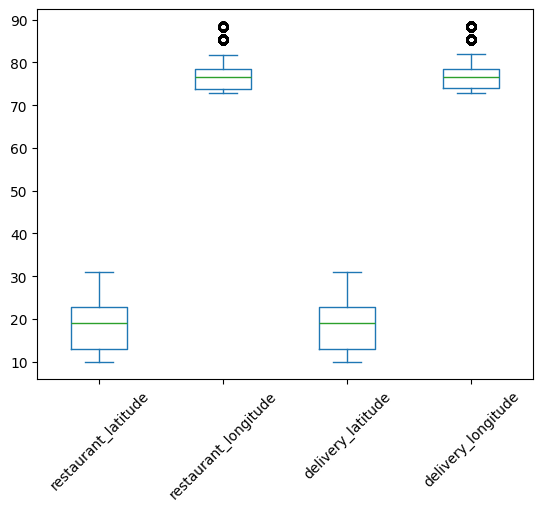

In [ ]:
location_columns = location.columns.tolist()
cleaned_data[location_columns].plot(kind="box")

plt.xticks(rotation=45)

display(cleaned_data[location_columns].describe())

<Axes: >

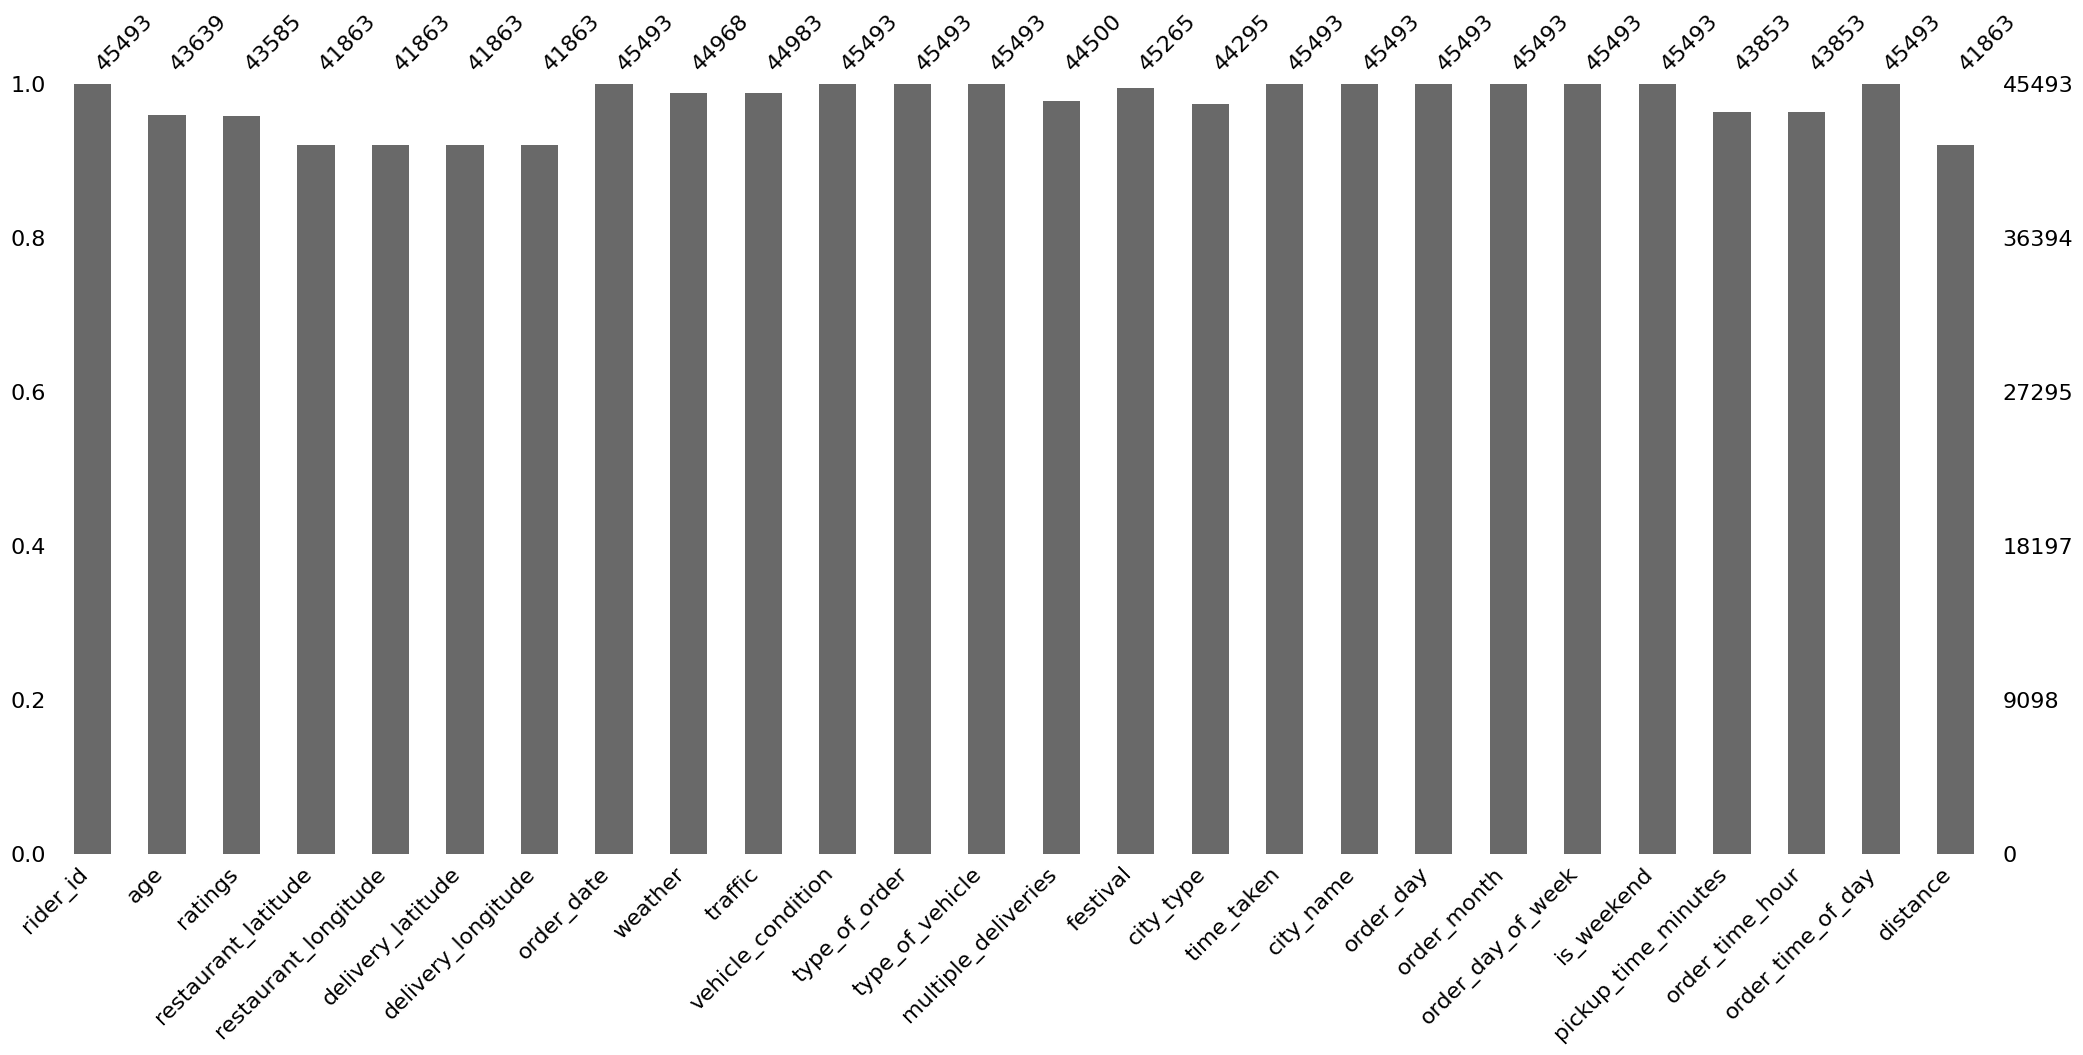

In [ ]:

msno.bar(cleaned_data)

<Axes: >

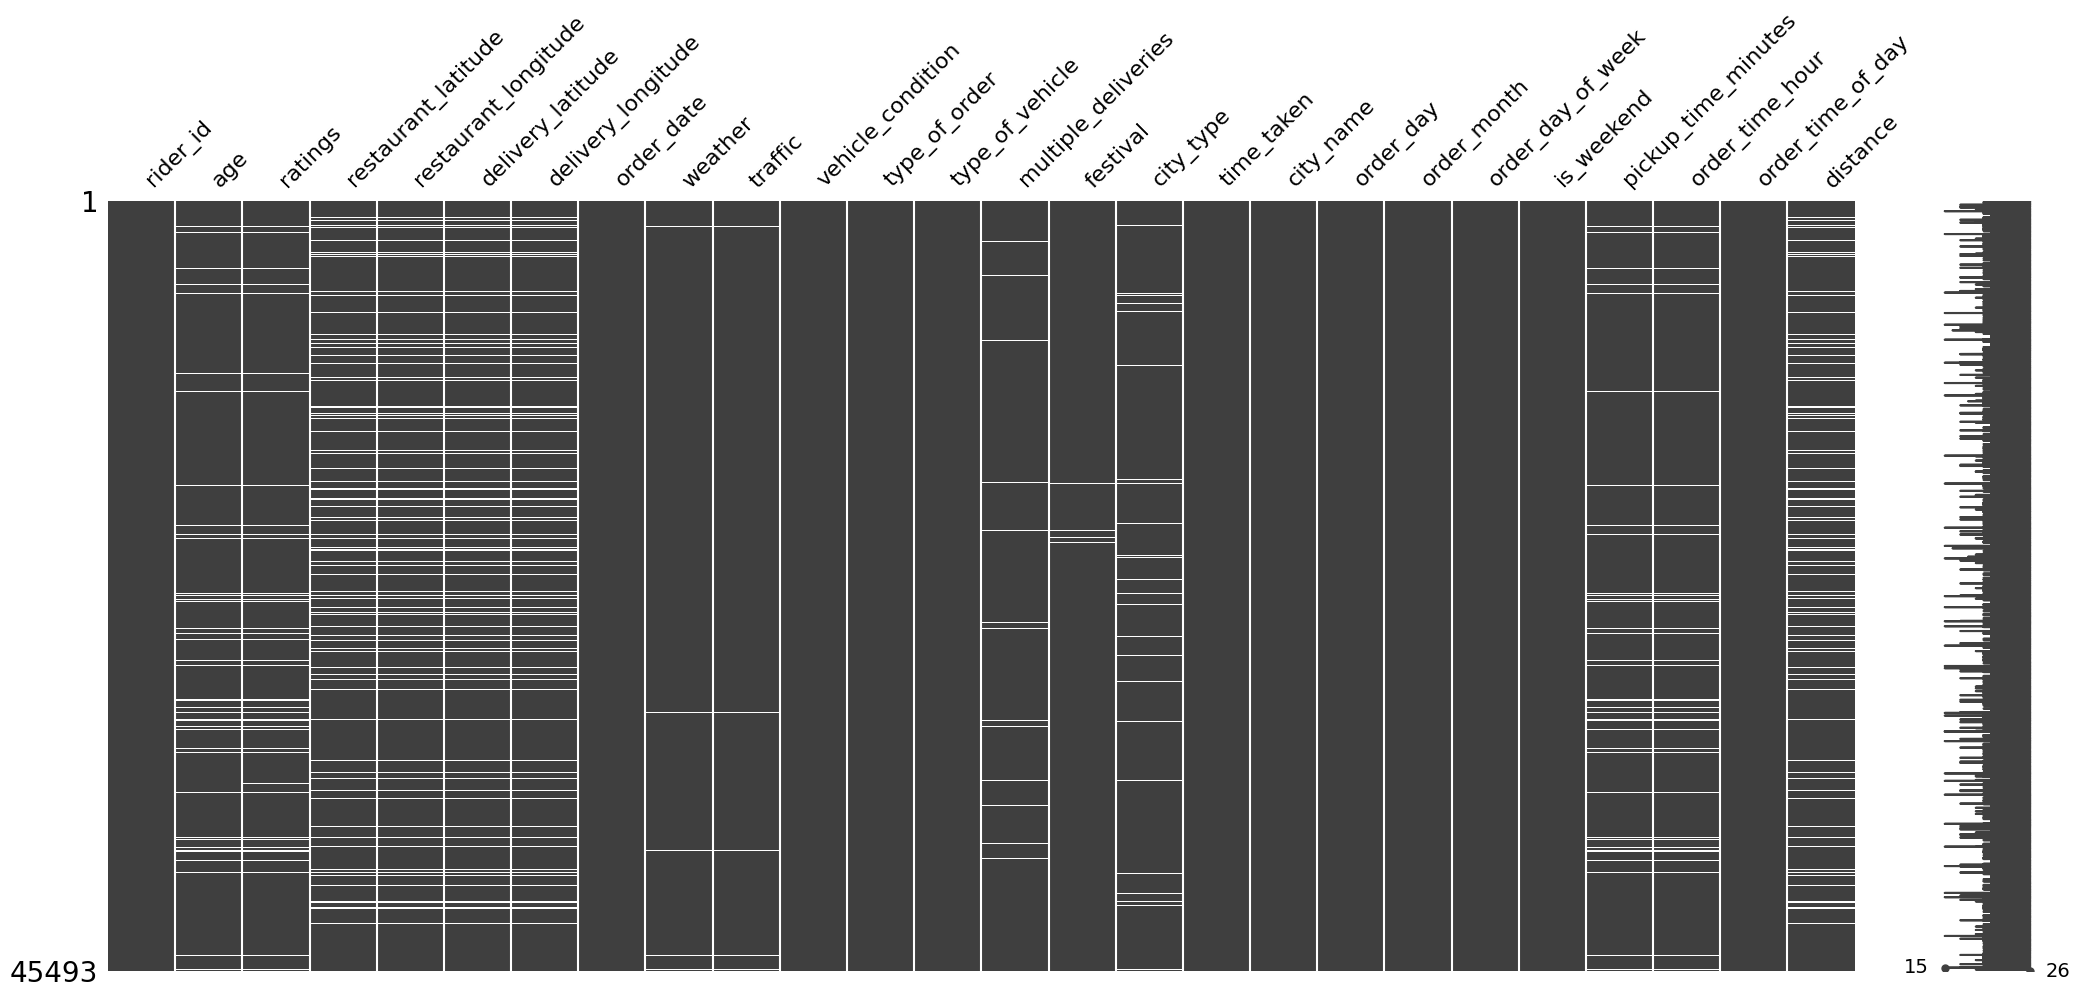

In [ ]:
msno.matrix(cleaned_data)

<Axes: >

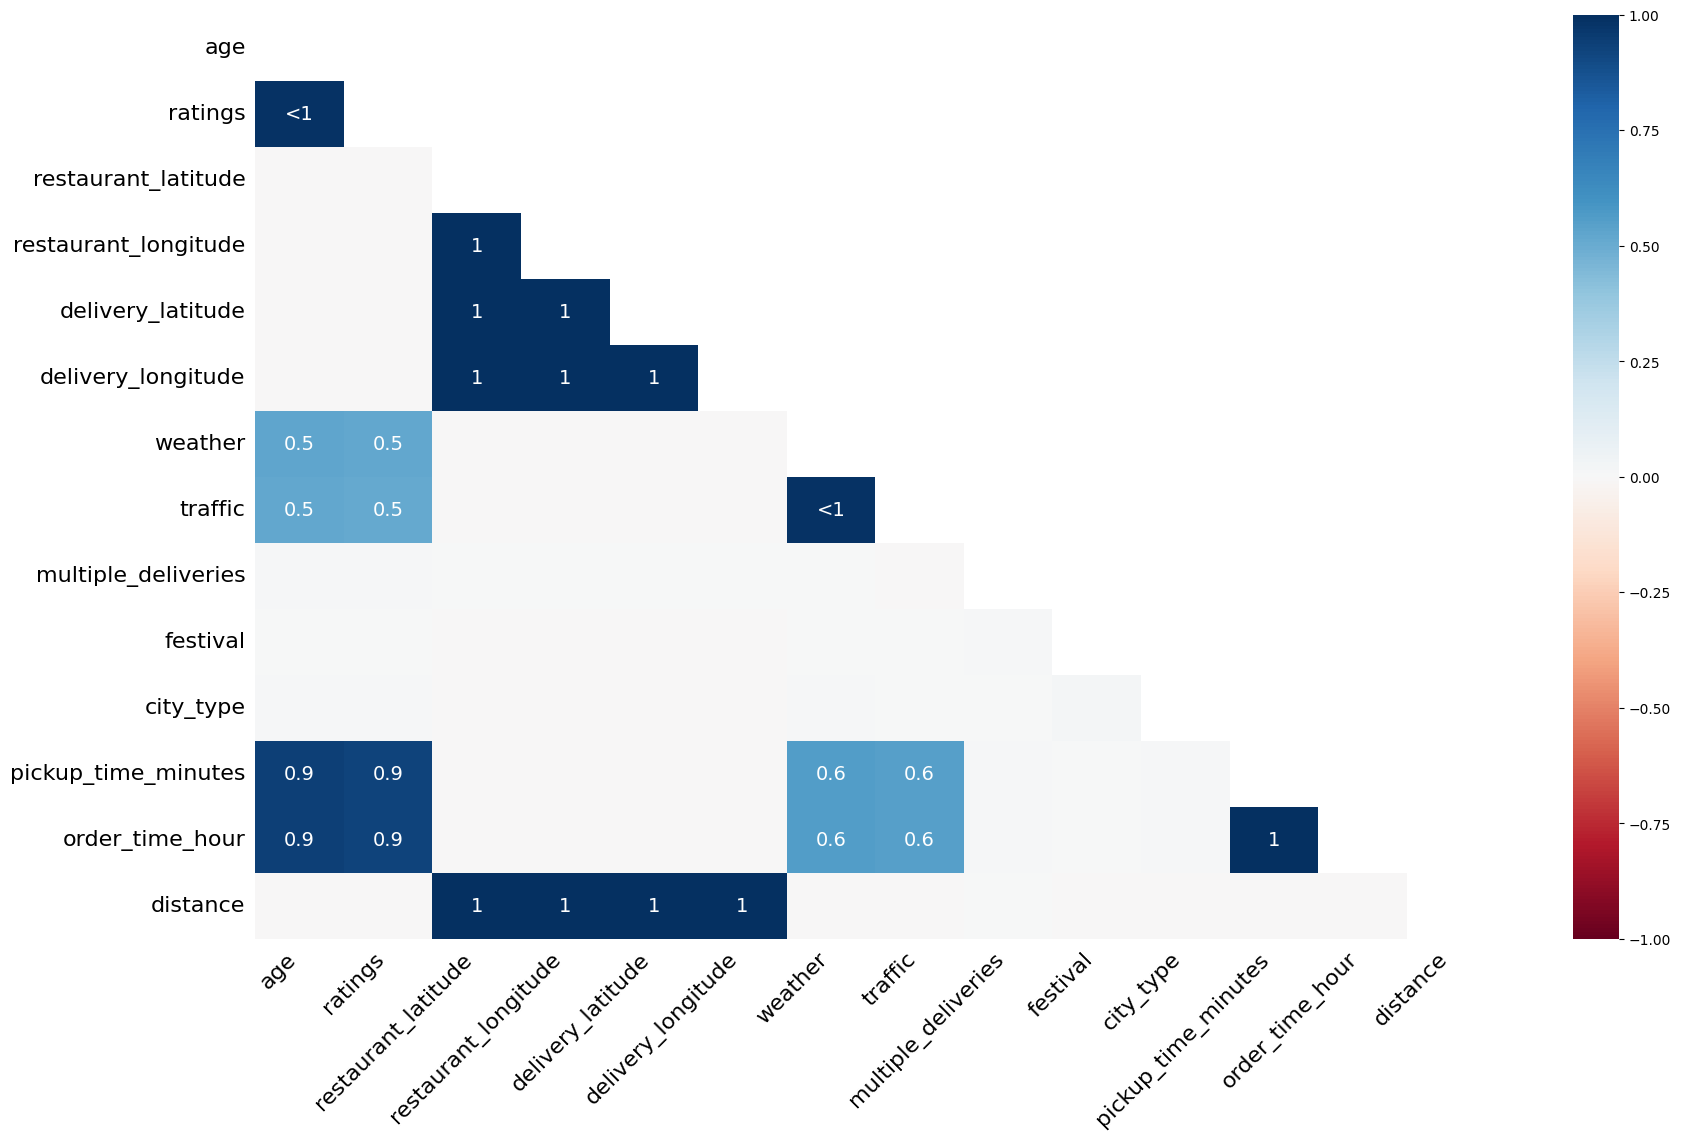

In [ ]:

# correlation chart of missing values
msno.heatmap(cleaned_data)

In [ ]:
cleaned_data.to_csv("cleaned_final.csv",index=False)